In [14]:
# Import libraries required for creating models and validating them
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
import warnings
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics as mt
import statsmodels.api as sm
from time import time
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [15]:
ccdefault=pd.read_csv('../data//UCI_Credit_Card.csv')
ccdefault.rename(columns={'default.payment.next.month':'DEFAULT'},inplace=True)
ccdefault.rename(columns={'PAY_0':'PAY_1'},inplace=True)

In [16]:
mcc = ccdefault.copy()
# Y Response variable dataframe
mcc_Y = mcc['DEFAULT']
# Features with no predictive features with respect to resposne variable
mcredit = mcc.drop(['DEFAULT'],axis=1)
# Create inci_X Explanatory Variables DF to support the individual models
mcc_X = mcredit
mcc_X_rf = mcredit.copy()

In [17]:
cc = ccdefault.copy() # taking a copy in memory
if 'DEFAULT' in cc:
    y = cc['DEFAULT'].values
    del cc['DEFAULT']
    del cc['BILL_AMT1']
    del cc['BILL_AMT2']
    del cc['BILL_AMT3']
    del cc['BILL_AMT4']
    del cc['BILL_AMT5']
    del cc['BILL_AMT6']
    X = cc.values
num_cv_iterations = 5
num_instances = len(y)
cv_object = StratifiedShuffleSplit(n_splits = num_cv_iterations,
test_size = 0.20, train_size = 0.80, random_state=11)
cv_object.get_n_splits(X, y)
print(cv_object)
for train_index, test_index in cv_object.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

StratifiedShuffleSplit(n_splits=5, random_state=11, test_size=0.2,
            train_size=0.8)
TRAIN: [28976 29616 20315 ...  6063 16283 15621] TEST: [ 6669  6830 16516 ... 16163  1990  7999]
TRAIN: [11237  9898 17028 ...  1265   611  7250] TEST: [ 4174 19421 15502 ... 19995  6124 25090]
TRAIN: [23721 14143  5492 ...  4346  5119 23351] TEST: [21778  4074 19546 ...   941 14061 13584]
TRAIN: [19706  2009 13912 ...  3924 20112 21366] TEST: [ 7136 15572 21097 ... 24126  8440  7078]
TRAIN: [ 5794  1831 15948 ... 18673 15962 17274] TEST: [17565 28798 29978 ... 10151 11434 21212]


In [18]:
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)


X_train_scaled1 = scl_obj.fit_transform(X_train) # apply to training
X_test_scaled1 = scl_obj.fit_transform(X_test) # apply those means and std to the test set (without snooping at the test set values)



In [19]:
# train the model just as before
random_forest = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=0)

random_forest.fit(X_train_scaled,y_train)  # train object

y_hat = random_forest.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )
ClassReport = mt.classification_report(y_test,y_hat)
print(ClassReport)

zip_vars = zip(random_forest.feature_importances_ ,cc.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef) # now print them out

accuracy: 0.8085
[[4535  138]
 [1011  316]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.70      0.24      0.35      1327

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000

AGE has weight of 0.0
MARRIAGE has weight of 0.0
SEX has weight of 0.0
ID has weight of 0.00013251283379621742
EDUCATION has weight of 0.0004081221520963373
PAY_AMT5 has weight of 0.001929294561442788
PAY_AMT4 has weight of 0.0028953024661164863
PAY_AMT6 has weight of 0.003324660433400152
PAY_AMT2 has weight of 0.01676467739014035
PAY_AMT3 has weight of 0.018098233123100806
PAY_AMT1 has weight of 0.023964159165862947
LIMIT_BAL has weight of 0.024302014109784872
PAY_6 has weight of 0.04764432702003415
PAY_4 has weight of 0.0691812377615732
PAY_5 has weight of 0.1130346009619896
PAY_3 has weight of 0.14306434264065562
PAY_2

In [7]:
iter_num=0
times_rec=[]
for train_indices, test_indices in cv_object.split(X,y): 
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
     #we count the time in executing the logistic regression
    t0 = time()
    random_forest = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=0)
    random_forest.fit(X_train,y_train)  # train object
    y_hat = random_forest.predict(X_test) # get test set precitions
    
    t1=time()
    diff=np.array([t1-t0])
    
    print ("The time it takes to fit and predict is " + str(diff[0]) + "\n")    
    times_rec=np.append(times_rec,diff)
    

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    
    print("\n *** CLASSIFICATION REPORT ****")
    #### CLASSIFICATION REPORT
    ClassReport = mt.classification_report(y_test,y_hat)
    print(ClassReport)
    
    iter_num+=1
    
    
print("The average time to fit and predict 3 logistic regressions with 80/20 training/test split is: " + str(times_rec.mean()) )

The time it takes to fit and predict is 0.9289908409118652

====Iteration 0  ====
accuracy 0.8045
confusion matrix
 [[4535  138]
 [1035  292]]

 *** CLASSIFICATION REPORT ****
              precision    recall  f1-score   support

           0       0.81      0.97      0.89      4673
           1       0.68      0.22      0.33      1327

    accuracy                           0.80      6000
   macro avg       0.75      0.60      0.61      6000
weighted avg       0.78      0.80      0.76      6000

The time it takes to fit and predict is 0.8351020812988281

====Iteration 1  ====
accuracy 0.805
confusion matrix
 [[4545  128]
 [1042  285]]

 *** CLASSIFICATION REPORT ****
              precision    recall  f1-score   support

           0       0.81      0.97      0.89      4673
           1       0.69      0.21      0.33      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.59      0.61      6000
weighted avg       0.79      0.81      0.76      6

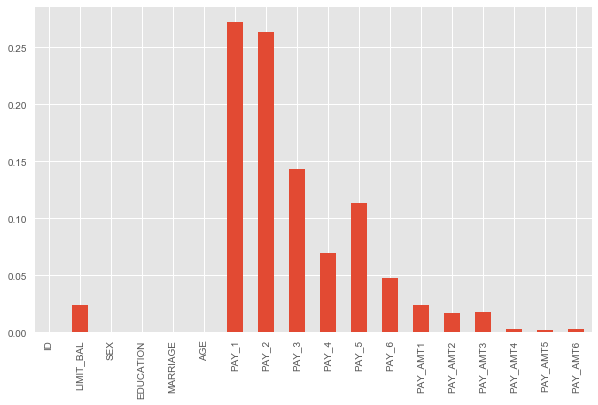

In [20]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plt.figure(figsize=(10,6))
weights = pd.Series(random_forest.feature_importances_,index=cc.columns)
weights.plot(kind='bar')
plt.show()

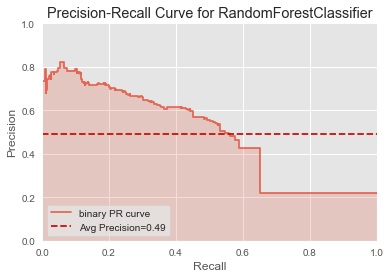

In [21]:
from yellowbrick.classifier import PrecisionRecallCurve

# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(random_forest)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

confusion matrix For random forest  model 
[[4535 1011]
 [ 138  316]]


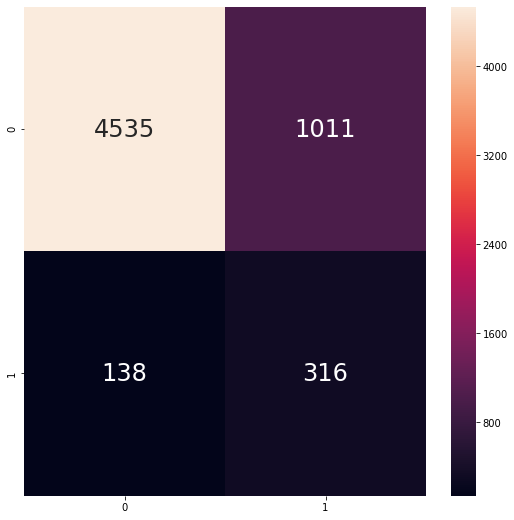

In [8]:
cm = confusion_matrix(y_hat, y_test)
plt.figure(figsize=(9,9))
print ('confusion matrix For random forest  model ')
print(cm)
sns.heatmap(cm, annot= True, annot_kws={"size": 24}, fmt = 'd')

accuracy: 0.7753333333333333
[[3891  782]
 [ 566  761]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      4673
           1       0.49      0.57      0.53      1327

    accuracy                           0.78      6000
   macro avg       0.68      0.70      0.69      6000
weighted avg       0.79      0.78      0.78      6000

AGE has weight of 0.0
ID has weight of 0.0
MARRIAGE has weight of 0.0
SEX has weight of 0.0
EDUCATION has weight of 0.00030705437839314436
PAY_AMT5 has weight of 0.0030217435428550165
PAY_AMT6 has weight of 0.00598177791031896
PAY_AMT4 has weight of 0.01258954994664686
PAY_AMT2 has weight of 0.022905822123317206
PAY_AMT3 has weight of 0.026102092945084362
PAY_AMT1 has weight of 0.028319001004733294
LIMIT_BAL has weight of 0.03632377536945605
PAY_6 has weight of 0.038802569414529094
PAY_4 has weight of 0.06100308931915917
PAY_5 has weight of 0.09329854982743202
PAY_3 has weight of 0.1544061413298047
PAY_1 has w

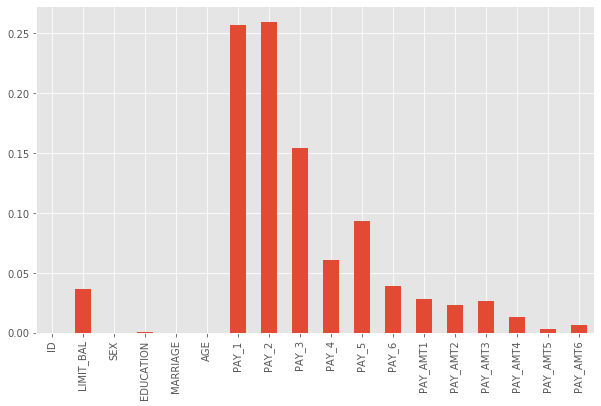

In [9]:
random_forest = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=0, class_weight='balanced')

random_forest.fit(X_train_scaled,y_train)  # train object

y_hat = random_forest.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )
ClassReport = mt.classification_report(y_test,y_hat)
print(ClassReport)

zip_vars = zip(random_forest.feature_importances_ ,cc.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef) # now print them out

from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plt.figure(figsize=(10,6))
weights = pd.Series(random_forest.feature_importances_,index=cc.columns)
weights.plot(kind='bar')
plt.show()



confusion matrix For random forest  model 
[[3891  566]
 [ 782  761]]


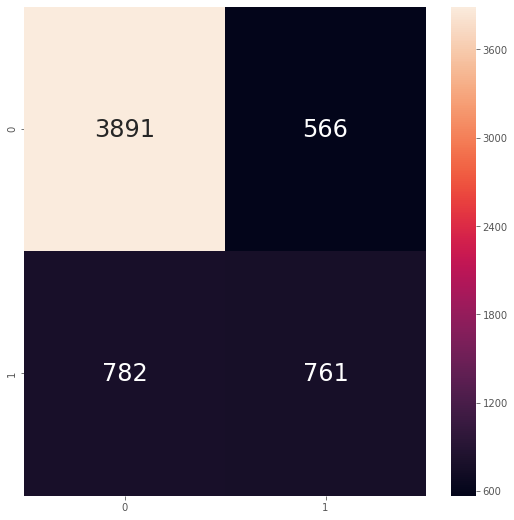

In [10]:
cm = confusion_matrix(y_hat, y_test)
plt.figure(figsize=(9,9))
print ('confusion matrix For random forest  model ')
print(cm)
sns.heatmap(cm, annot= True, annot_kws={"size": 24}, fmt = 'd')


Following is a Comparison of Decision Tree and Random forest classifiers with same date. We are using error estimates to compare two models. The error estimates should follow Gaussian distribution. We calculate mean and standard error using the formula discussed in the class. 
<TODO add image and formula >
    We are caclulating confidence interval for error differences to figure out if the differences are significant

In [11]:
iter_num=0
times_rec=[]
error_rec= [] 
for train_indices, test_indices in cv_object.split(X,y): 
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train,y_train) # train object
    
    random_forest = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=0)
    random_forest.fit(X_train,y_train) 
    
    y_hat_dt = decision_tree.predict(X_test) 
    y_hat_rf = random_forest.predict(X_test) 

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc_dt = mt.accuracy_score(y_test,y_hat_dt)
    acc_rf = mt.accuracy_score(y_test,y_hat_rf)
    error_rec.append(acc_dt - acc_rf)

    iter_num+=1

print(error_rec)



[-0.0675, -0.08066666666666666, -0.07899999999999996, -0.09083333333333332, -0.07983333333333331]


In [62]:
d_bar = sum(error_rec)/len(error_rec)
siqma_squared = sum((error_rec - d_bar))/(5-1)
print(d_bar)
print(siqma_squared)

-0.08170000000000002
6.938893903907228e-18


In [60]:
from scipy import stats
import math

confidence_interval = ( d_bar + (1/math.sqrt(4))*stats.t.isf(.975, 4),  d_bar - (1/math.sqrt(4))*stats.t.isf(.975, 4))
print(confidence_interval)


(-1.4699225525988995, 1.3065225525988993)
